# Homework 4 for Perspective

## Qian Zhang

## Question 1 

### (a)

In [1]:
# import libraries

import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import scipy.optimize as opt

In [2]:
# income data import
income = np.loadtxt('data/incomes.txt')

(45000, 140000)

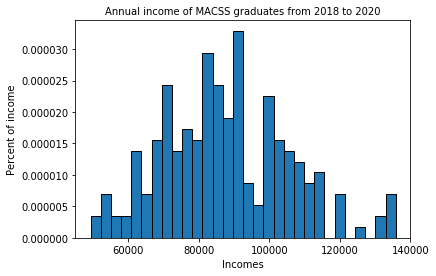

In [3]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True, edgecolor='k')
plt.title('Annual income of MACSS graduates from 2018 to 2020', fontsize=10)
plt.xlabel(r'Incomes')
plt.ylabel(r'Percent of income')
plt.xlim([45000,140000])  # This gives the xmin and xmax to be plotted"

### (b)

In [4]:
#retrieved from Rick's notebook and modify the trun_normpdf to log normal

def trunc_norm_pdf_log(xvals, mu, sigma, cut_lb, cut_ub):

    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) -
                       lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu)))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

# calc the log likelihood value under trun

def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):

    pdf_vals = trunc_norm_pdf_log(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

Text(0.5, 1.0, 'Lognormal PDF, mu=11.0, sigma=0.5')

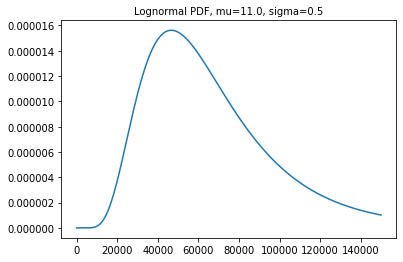

In [5]:
# plot the pdf

mu=11.0
sigma=0.5
point=np.linspace(1e-10, 150000, 50000)
pdf_log=trunc_norm_pdf_log(point, mu, sigma, 0, 150000)
plt.plot(point,pdf_log)
plt.title('Lognormal PDF, mu=11.0, sigma=0.5', fontsize=10)

In [6]:
# log likelihood value
log_mle=log_lik_truncnorm(income, mu, sigma, 0, 150000)
print ('The log likelihood value is {}.'.format(log_mle))

The log likelihood value is -2379.120591931827.


### (c)

In [7]:
# define criterion function

def criter(para, *args):
    mu, sigma = para
    income,lb,rb=args
    log_mle=log_lik_truncnorm(income, mu, abs(sigma), lb, rb)
    return -log_mle

# max likelihood calc

init_guess=np.array([11,1])
mle_arg=(income, 0, 150000)
para_esti=opt.minimize(criter,init_guess,args=(mle_arg))

In [8]:
# report the estimation

mu_esti=para_esti.x[0]
sigma_esti=para_esti.x[1]
print ('ML estimates for mu is {}.'.format(mu_esti))
print ('ML estimates for sigma is {}.'.format(abs(sigma_esti)))
print ('\n Maximized log likelihood is {}.'.format(-para_esti.fun))

ML estimates for mu is 11.361699970356922.
ML estimates for sigma is 0.21174326319251174.

 Maximized log likelihood is -2240.934337511636.


In [9]:
# calc the var-cov matrix

vcv_mle = para_esti.hess_inv
print('The variance-covariance matrix is: \n\n', vcv_mle)

The variance-covariance matrix is: 

 [[2.13592335e-04 3.04275407e-05]
 [3.04275407e-05 1.39066685e-04]]


Text(0, 0.5, 'Percent of income')

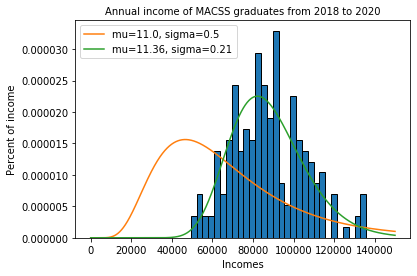

In [10]:
# plot

ax=plt.gca()
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True, edgecolor='k')
ax.plot(point,pdf_log,label='mu=11.0, sigma=0.5')

pdf_log_mle=trunc_norm_pdf_log(point, mu_esti, sigma_esti, 0, 150000)
ax.plot(point,pdf_log_mle,label='mu=11.36, sigma=0.21')
ax.legend()
plt.title('Annual income of MACSS graduates from 2018 to 2020', fontsize=10)
plt.xlabel(r'Incomes')
plt.ylabel(r'Percent of income')

### (d)

In [11]:
# likelyhood ratio test

mu_h, sig_h = np.array([11, 0.5])

mu_MLE=mu_esti
sig_MLE=sigma_esti

log_lik_h0 = log_lik_truncnorm(income, mu_h, sig_h, 0, 150000)
print('Hypothesis value log likelihood is: ', log_lik_h0)
log_lik_mle = log_lik_truncnorm(income, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood is: ', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('Likelihood ratio value is: ', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Hypothesis value log likelihood is:  -2379.120591931827
MLE log likelihood is:  -2240.934337511636
Likelihood ratio value is:  276.3725088403826
Chi squared of H0 with 2 degrees of freedom p-value =  0.0


Since the p value is equal to zero, we can reject the null hypothsis at any significant level that the actual data comes from the lognormal distribution with mu = 11.0 and sigma = 0.5 and 0<=x<=150000. 

### (e)

In [12]:
pr1=(1-lognorm.cdf(100000,s=sig_MLE, scale=np.exp(mu_MLE))/(lognorm.cdf(150000,s=sig_MLE, scale=np.exp(mu_MLE))))
pr2=(lognorm.cdf(75000,s=sig_MLE, scale=np.exp(mu_MLE)))/(lognorm.cdf(150000,s=sig_MLE, scale=np.exp(mu_MLE)))

In [13]:
print ('The probability of earning more than $100,000 is {} %.'.format(pr1*100))
print ('The probability of earning less than $75,000 is {} %.'.format(pr2*100))

The probability of earning more than $100,000 is 23.427612188119852 %.
The probability of earning less than $75,000 is 26.07601849531803 %.


## Question 2

### (a)

In [14]:
# import the sick.txt

df=pd.read_csv('data/sick.txt')
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [15]:
# define norm pdf func

def norm_pdf(xvals, mu, sigma):
    pdf_vals = (1/(abs(sigma) * np.sqrt(2 * np.pi))) * np.exp( - (xvals - mu)**2 / (2 * abs(sigma)**2))
    
    # For those pdfs that are extremely closed to zero (which will get warning of 'divided by zero encounted in log' in np.log), set the pdf as 1e-10.
    
    pdf_vals[pdf_vals==0]=1e-10
    return pdf_vals

In [16]:
# calc the new likelyhood value

def norm_like_vals(sick2, age2, child2, temp2, b0, b1, b2, b3, sigma):
    
    er=sick2-b0-b1*age2-b2*child2-b3*temp2
    pdf_vals=norm_pdf(er, 0, sigma)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = log_pdf_vals.sum()
    
    return log_lik_val

In [17]:
# define the new criterion function 

def criter_new(para, *args):
    
    b0,b1,b2,b3,sigma = para
    sick1, age1, child1, temp1 =args
    log_mle=norm_like_vals(sick1, age1, child1, temp1, b0, b1, b2, b3, abs(sigma))
    
    return -log_mle


In [18]:
# give the value from data

sick,age,child,temp = df['sick'], df['age'], df['children'], df['avgtemp_winter']

# estimate 

init_guess_new=np.array([0.1192072072072072,0.01,0.4,-0.01,0.5])
mle_arg_new=(sick, age, child, temp)

# The default method cannot converge, so change to the L-BFGS-B method.

para_esti_new=opt.minimize(criter_new, init_guess_new, args=mle_arg_new, method='L-BFGS-B')

In [19]:
# report the estimation

b0_mle,b1_mle,b2_mle,b3_mle,sigma_mle=para_esti_new.x

print ('ML estimates for beta_0 is {}.'.format(b0_mle))
print ('ML estimates for beta_1 is {}.'.format(b1_mle))
print ('ML estimates for beta_2 is {}.'.format(b2_mle))
print ('ML estimates for beta_3 is {}.'.format(b3_mle))
print ('ML estimates for sigma is {}.'.format(abs(sigma_mle)))

print ('\nMaximized log likelihood is {}.'.format(-para_esti_new.fun))

ML estimates for beta_0 is 0.25164455313047634.
ML estimates for beta_1 is 0.012933546519278399.
ML estimates for beta_2 is 0.4004997925080147.
ML estimates for beta_3 is -0.009991726504496284.
ML estimates for sigma is 0.0030178641545379097.

Maximized log likelihood is 876.8650688586918.


In [20]:
# calc the new var-cov matrix

vcv_mle_new = para_esti_new.hess_inv.todense()
print('The variance-covariance matrix is: \n\n', vcv_mle_new)

The variance-covariance matrix is: 

 [[ 7.78045774e+01  8.94752615e-01  8.78970862e-01 -2.21078834e+00
   1.44551618e+01]
 [ 8.94752615e-01  7.27012120e-02  4.16123556e-01 -9.17802877e-02
   9.26967879e-01]
 [ 8.78970862e-01  4.16123556e-01  2.66457309e+00 -4.56904883e-01
   5.12847754e+00]
 [-2.21078834e+00 -9.17802877e-02 -4.56904883e-01  1.33373712e-01
  -1.21986029e+00]
 [ 1.44551618e+01  9.26967879e-01  5.12847754e+00 -1.21986029e+00
   1.19780087e+01]]


### (b)

In [21]:
# likelyhood ratio test for question 2

b0_h,b1_h,b2_h,b3_h,sigma_h = np.array([1,0,0,0,0.1])

log_lik_h0_new = norm_like_vals(sick,age,child,temp,b0_h,b1_h,b2_h,b3_h,sigma_h)
print('Hypothesis value log likelihood is: ', log_lik_h0_new)
log_lik_mle_new = norm_like_vals(sick,age,child,temp,b0_mle,b1_mle,b2_mle,b3_mle,abs(sigma_mle))
print('MLE log likelihood is: ', log_lik_mle_new)
LR_val_new = 2 * (log_lik_mle_new - log_lik_h0_new)
print('Likelihood ratio value is: ', LR_val_new)
pval_h0_new = 1.0 - sts.chi2.cdf(LR_val_new, 5)
print('Chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0_new)

Hypothesis value log likelihood is:  -2253.700688042125
MLE log likelihood is:  876.8650688586918
Likelihood ratio value is:  6261.131513801633
Chi squared of H0 with 5 degrees of freedom p-value =  0.0


Since the p value is still equal to zero, we can reject the null hypothsis at any significant level that age, number of children, and average winter temperature have no effect on the number of sick days.